In [1]:
#import libraries

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

In [42]:
def joukowski(center_x,center_y, radius_circle,a):
  """
  joukowski takes the center and radius of a circle and maps it according to the Joukowski transformation. 

  center_x : x value of the center of the circle
  center_y : y value of the center of the circle
  radius_circle : radius of the circle
  a : parameter of the joukowski transformation

  return plot of the circle and the Joukowski transformation, additionally displays the non-conformal points and the center of the circle
  """ 




  #initialize the variables we will be using

  #the angles from 0 to 2pi
  range_angles=np.linspace(0,2*np.pi, 10000, endpoint=False)
  len_vector = len(range_angles)

  #x and y values on the circle
  x_values = np.zeros(len_vector)
  y_values = np.zeros(len_vector)

  #cos(theta), cos(sin), and radius value relative to the origin
  theta_cos_values=np.zeros(len_vector)
  theta_sin_values=np.zeros(len_vector)
  radius_values=np.zeros(len_vector)

  #x and y values of the Joukowski transformation
  jouk_x_values = np.zeros(len_vector)
  jouk_y_values = np.zeros(len_vector)


  #calculations 
  for i in range(len(range_angles)):
    # find x,y,cos(theta), sin(theta) and the radius w.r.t the origin 
    x_values[i] = center_x+radius_circle*np.cos(range_angles[i])
    y_values[i]=center_y+radius_circle*np.sin(range_angles[i])
    radius_values[i]=np.sqrt(x_values[i]**2 + y_values[i]**2)
    theta_cos_values[i]= x_values[i]/radius_values[i]
    theta_sin_values[i]=y_values[i]/radius_values[i]

    # find the x and y values of the Joukowski transformation
    jouk_x_values[i] = radius_values[i]*theta_cos_values[i]+(a/radius_values[i])*theta_cos_values[i]
    jouk_y_values[i]=radius_values[i]*theta_sin_values[i]-(a/radius_values[i])*theta_sin_values[i]


  
  
  #plot 

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)

  #customize the axes
  ax.spines['left'].set_position('zero')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')

  #title of the graph
  title_plot = f"Cicle of radius {radius_circle} centered at ({center_x}, {center_y})"
  plt.title(title_plot)

  #plot the circle, the Joukowski transformation, the non-conformal points, and the center of the circle
  plt.plot(x_values,y_values, 'b.', markersize=0.1,label ='circle') 
  plt.plot(jouk_x_values,jouk_y_values, 'r.', markersize=0.3, label ='Joukowski transformation')
  plt.plot([np.sqrt(a),-np.sqrt(a)], [0,0], '*', color = '#74ff3c', markersize=10, label ='not conformal' ) 
  plt.plot(center_x, center_y, 'o', color = '#ff3cf7', markersize=5, label ='circle center')  

  #define handles for the legend  
  blue_circle= mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                          markersize=10, label='circle')
  red_circle = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=10, label='Joukowski transformation')
  green_star = mlines.Line2D([], [], color='#74ff3c', marker='*', linestyle='None',
                          markersize=10, label='not conformal')
  pink_circle = mlines.Line2D([], [], color='#ff3cf7', marker='.', linestyle='None',
                          markersize=10, label='circle center')

  #plot the legend
  plt.legend(handles=[blue_circle, red_circle, green_star, pink_circle], bbox_to_anchor =(1.55, 1.15))


  #remove the (0,0) point in the y axis
  plt.draw()

  origin="0.0"
  for n, label in enumerate(ax.yaxis.get_ticklabels()):
    if(origin==label.get_text()):
      label.set_visible(False)

  fig.canvas.draw_idle()




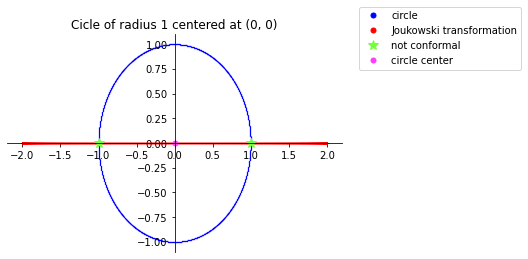

In [43]:
#define the center and radius of the circle

center_x=0
center_y=0
radius_circle=1


#define a in the Joukowski transformation:
a=1


#call the function
joukowski(center_x, center_y, radius_circle, a)
